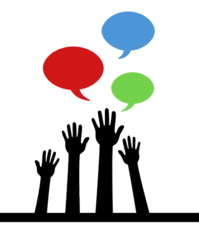

# The Sparks Foundation 
# GRIP : Data Science and Business Analytics TASK 1

# Author : VISHAL KK

## Problem statement:

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## To predict:

### What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing the Libraries

In [ ]:
# warnings 
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

%matplotlib inline

# Loading the dataset

In [2]:
url="http://bit.ly/w-data"
ds=pd.read_csv(url)
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# To understand the dataset

In [3]:
ds.shape

(25, 2)

# Know the details on dataset

In [4]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Evaluating the missing dataset

In [10]:
ds.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Visualizing data

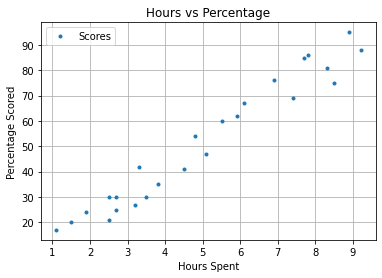

In [15]:
#plotting score distribution 
ds.plot(x="Hours",y="Scores",style=".")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Spent")
plt.ylabel("Percentage Scored")
plt.grid()

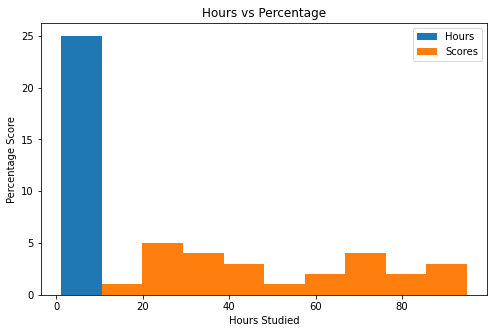

In [17]:
ds.plot(kind='hist', figsize=(8, 5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

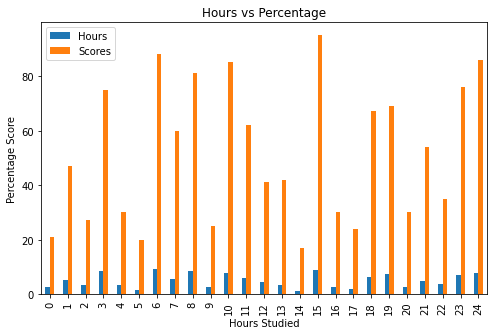

In [18]:
ds.plot(kind='bar',figsize=(8,5))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# checking the correlations

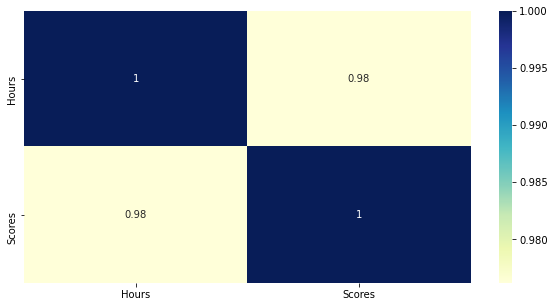

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.corr(),annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Preparing data for modelling

In [21]:
X = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values

In [22]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


# simple linear regression model training

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Training is complete.')

Training is complete.


In [24]:
print("The coefficient is:")
lr.coef_

The coefficient is:


array([9.94167834])

In [25]:
# Getting the best fitted line 
line = lr.intercept_+lr.coef_*X

# plotting the best fitted line on the graph

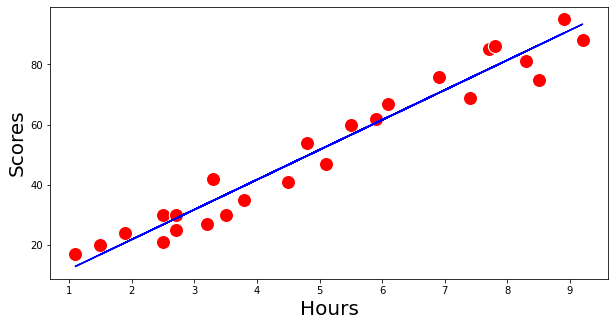

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(ds['Hours'],ds['Scores'],s=200,color='r')
plt.plot(ds['Hours'],line,'b')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()


# making prediction

In [28]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [29]:
datafr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
datafr

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# plotting actual vs prediction

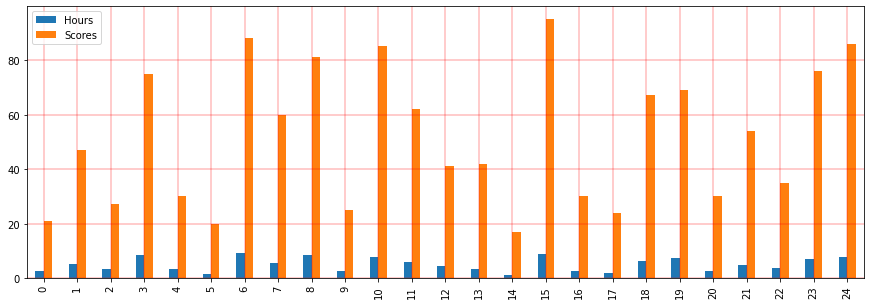

In [30]:
ds.plot(kind = 'bar', figsize = (15,5))
plt.grid(which = 'major', linewidth = '0.4', color = 'yellow')
plt.grid(which = 'major', linewidth = '0.4', color = 'red')
plt.show()

# Testing the model to redict the percentage of student if he studies for 9.25 hours as given

In [34]:
hours = 9.25
pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


# Evaluating the performance of the model
## The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset

In [36]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


## Conclusion: 
### We can see the value of the root mean squared error is 4.509 and the mean value of the percentages of all the students is 51.48 (from the statistical details obtained in cell no. 5). Here root mean squared error is less than 10% of the mean value of the percentages of all the student scores. Hence, it is safe to conclude the model did a decent job to predict the the student score as 93.89 % when student studies for 9.25 hours.